# language model 

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np 

## preprocess the data.

In [10]:
# data url: https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt 
data = open("data/irish-lyrics-eof.txt").read()
corpus = data.lower().split('\n')
print(corpus[:5])

['come all ye maidens young and fair', 'and you that are blooming in your prime', 'always beware and keep your garden fair', 'let no man steal away your thyme', 'for thyme it is a precious thing']


In [17]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
        
        
max_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_len, padding='pre'))

xs, labels = input_sequences[:, :-1], input_sequences[:, -1]
labels = tf.keras.utils.to_categorical(labels, num_classes=total_words)


## define -> compile -> fit your model

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(total_words, 64, input_length=max_len-1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(total_words, activation="softmax")
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(xs, labels, epochs=300, verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 64)            172160    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 2690)              174850    
Total params: 371,842
Trainable params: 371,842
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
377/377 [==============================] - 4s 11ms/step - loss: 6.8051 - accuracy: 0.0649
Epoch 2/300
377/377 [==============================] - 5s 13ms/step - loss: 6.3157 - accuracy: 0.0657
Epoch 3/300
377/377 [==============================] - 4s 11ms/step - loss: 6.1760 - accuracy: 0.0752
Epoch 4/300
377/377 [==============================] - 4s 10ms/step - loss

377/377 [==============================] - 4s 10ms/step - loss: 1.8082 - accuracy: 0.6043
Epoch 74/300
377/377 [==============================] - 4s 10ms/step - loss: 1.8116 - accuracy: 0.6057
Epoch 75/300
377/377 [==============================] - 4s 9ms/step - loss: 1.7727 - accuracy: 0.6113
Epoch 76/300
377/377 [==============================] - 4s 9ms/step - loss: 1.7343 - accuracy: 0.6217
Epoch 77/300
377/377 [==============================] - 4s 9ms/step - loss: 1.6963 - accuracy: 0.6313
Epoch 78/300
377/377 [==============================] - 4s 9ms/step - loss: 1.6828 - accuracy: 0.6321
Epoch 79/300
377/377 [==============================] - 4s 11ms/step - loss: 1.6552 - accuracy: 0.6367
Epoch 80/300
377/377 [==============================] - 4s 11ms/step - loss: 1.6337 - accuracy: 0.6421
Epoch 81/300
377/377 [==============================] - 5s 13ms/step - loss: 1.6117 - accuracy: 0.6503
Epoch 82/300
377/377 [==============================] - 4s 12ms/step - loss: 1.5935 - accu

377/377 [==============================] - 6s 15ms/step - loss: 0.7944 - accuracy: 0.8134
Epoch 153/300
377/377 [==============================] - 4s 12ms/step - loss: 0.7871 - accuracy: 0.8122
Epoch 154/300
377/377 [==============================] - 4s 11ms/step - loss: 0.7855 - accuracy: 0.8146
Epoch 155/300
377/377 [==============================] - 4s 10ms/step - loss: 0.7736 - accuracy: 0.8171
Epoch 156/300
377/377 [==============================] - 6s 15ms/step - loss: 0.7644 - accuracy: 0.8168
Epoch 157/300
377/377 [==============================] - 4s 10ms/step - loss: 0.7587 - accuracy: 0.8211
Epoch 158/300
377/377 [==============================] - 4s 10ms/step - loss: 0.7627 - accuracy: 0.8178
Epoch 159/300
377/377 [==============================] - 4s 11ms/step - loss: 0.7655 - accuracy: 0.8144
Epoch 160/300
377/377 [==============================] - 4s 12ms/step - loss: 0.7626 - accuracy: 0.8161
Epoch 161/300
377/377 [==============================] - 5s 12ms/step - loss: 

377/377 [==============================] - 5s 14ms/step - loss: 0.5817 - accuracy: 0.8429
Epoch 232/300
377/377 [==============================] - 4s 11ms/step - loss: 0.5799 - accuracy: 0.8457
Epoch 233/300
377/377 [==============================] - 4s 10ms/step - loss: 0.5653 - accuracy: 0.8485
Epoch 234/300
377/377 [==============================] - 4s 10ms/step - loss: 0.5485 - accuracy: 0.8520
Epoch 235/300
377/377 [==============================] - 4s 9ms/step - loss: 0.5466 - accuracy: 0.8516
Epoch 236/300
377/377 [==============================] - 4s 10ms/step - loss: 0.5454 - accuracy: 0.8512
Epoch 237/300
377/377 [==============================] - 4s 9ms/step - loss: 0.5408 - accuracy: 0.8525
Epoch 238/300
377/377 [==============================] - 4s 9ms/step - loss: 0.5515 - accuracy: 0.8491
Epoch 239/300
377/377 [==============================] - 4s 9ms/step - loss: 0.5674 - accuracy: 0.8470
Epoch 240/300
377/377 [==============================] - 4s 9ms/step - loss: 0.585

## visualize the training process progress.

In [19]:
import matplotlib.pyplot as plt
def graph(str):
    plt.plot(history.history[str])
    plt.xlabel("Epochs")
    plt.ylabel(str)
    plt.show()

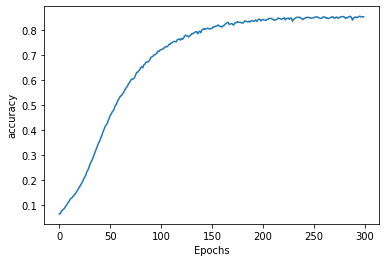

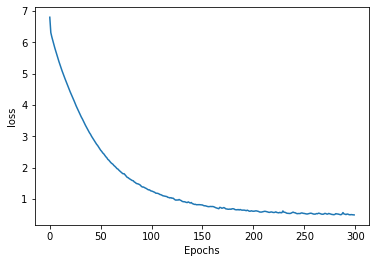

In [20]:
graph("accuracy")
graph("loss")

## predict

In [ ]:
ids_to_words = dict([(wrd_id, wrd_txt) for (wrd_txt, wrd_id) in tokenizer.word_index.items()])

In [21]:
input = "using your time"

# generate 15 words
for i in range(150):
    seq = tokenizer.texts_to_sequences([input])
    seq = pad_sequences(seq, maxlen=max_len-1, padding='pre')
    word_id = model.predict_classes(seq)
    input += " " + ids_to_words[int(word_id)]

print(input)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


NameError: name 'ids_to_words' is not defined

## Save the model.

In [56]:
model.save("model/lang_generator")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model/lang_generator/assets
